# Implementacion Perceptron Regresivo en Python
Para esto, resolveremos el caso Ecommerce adaptando nuestro perceptrón de clasificación para que resuelva un problema de regresión

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Ecommerce.csv')

In [11]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Formulación del Modelo

In [12]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']].values
y = df['Yearly Amount Spent'].values

In [13]:
X[:5]

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       [34.30555663, 13.71751367, 36.72128268,  3.12017878],
       [33.33067252, 12.79518855, 37.5366533 ,  4.44630832]])

In [14]:
y[:5]

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205])

### Implementación Perceptrón

In [15]:
# Define una función que calcule el producto punto entre dos vectores:
def dot_product(x, w):
    return np.dot(x,w)

In [16]:
# Define la función de activación.
def activation(x):
    # en este caso utilizamos funcion de activacion lineal
    return x

In [25]:
activation(1000)

1000

In [26]:
# Define la función de entrenamiento del perceptrón:
def perceptron_train(X, y, num_epochs, learning_rate):
    #inicializar pesso de forma aleatoria
    weights=np.random.rand(X.shape[1])
    

    # acá dejaremos el error que hubo entre lo real y lo calculado
    # de cada iteración
    errors=[]
    
    # iterar las epocas
    for epochs in range(num_epochs):
        
        epoch_error=0

        #itera sobre todos los elementos del set de entrenamiento
        for i in range(X.shape[0]):
            # calcular la salida del perceptron
            output=activation(dot_product(X[i], weights))
            # contabilizar el error
            if output!=y[i]:
                # definimos la siguiente metrica de error
                #calcular como diferencia cuadratica
                error=y[i] - output
                # actualizamos los pesos si la salida es incorrecta
                weights=weights + learning_rate*error*X[i]
                epoch_error= epoch_error+abs(error)
        errors.append(epoch_error)

    return weights, errors
 

In [32]:
weights, errors = perceptron_train(X, y, num_epochs=30, learning_rate=0.0001)
#el learning_rate se disminuye para que los parametros puedan converger

In [33]:
weights, errors 

(array([11.21178754, 27.56029391, -9.82400511, 48.06826689]),
 [32441.697798775633,
  29720.622138235933,
  28360.884313636234,
  27080.838680134017,
  25870.978957171614,
  24727.560818828344,
  23653.981224551804,
  22646.733335089757,
  21697.646212990763,
  20814.223101535845,
  19986.03386890654,
  19208.721154394774,
  18485.726087627983,
  17810.22280144889,
  17178.676823860213,
  16586.66736936948,
  16027.292960333047,
  15508.160564895403,
  15021.004354389434,
  14569.73121247434,
  14156.257504270718,
  13776.471536183275,
  13430.560355434782,
  13119.447582526283,
  12831.241565862034,
  12565.955017625702,
  12320.535060487593,
  12097.01643367312,
  11895.273488821329,
  11714.569631976057])

## Haciendo Predicciones

In [34]:
def perceptron_predict(x, weights):
    return activation(dot_product(x,weights))

In [35]:
x = np.array([34.49726773, 12.65565115, 39.57766802,  4.08262063])
prediction = perceptron_predict(x, weights)
print(prediction) 

543.0027867985995


### Prediccion con [34.497268, 12.655651, 39.577668, 4.082621]


In [39]:

x = np.array([34.497268, 12.655651, 39.577668, 4.082621])
prediction = perceptron_predict(x, weights)
print(prediction) 

543.0028036734768


## Evaluando el desempeño

In [36]:
y_pred = [perceptron_predict(x, weights) for x in X]
y_pred

[543.0027868674337,
 426.05564528093794,
 514.9886172363043,
 551.9168383160054,
 571.3016368985924,
 636.5828257931395,
 537.0982803788036,
 553.4797048673729,
 538.6014521992352,
 472.70566038768914,
 502.37173073411435,
 513.2637754621418,
 460.0960840612828,
 562.5551780133517,
 485.66359281602354,
 498.5350514297839,
 491.52040817321137,
 432.93222344103685,
 463.6320981448006,
 581.2778596567928,
 533.8993251282341,
 437.6754583510945,
 449.6400598196901,
 517.3302999224425,
 646.7476568866085,
 454.6727770175624,
 593.9209712796651,
 493.21754975229385,
 543.3290957234552,
 562.680673275972,
 503.7729214316091,
 491.6253750833896,
 587.8118507255645,
 481.7266077475624,
 539.4355206741074,
 500.41772846765474,
 407.24158490929204,
 500.79947492504334,
 497.77908068025425,
 554.9893314546016,
 538.7390551211358,
 518.2630514538785,
 561.2720465244764,
 547.3717993021075,
 482.797908202552,
 514.5102247179983,
 569.4243580744953,
 564.405657419956,
 492.8332495023991,
 463.3483429

### Calcule el MAE.

In [42]:
np.mean(np.abs(y-y_pred))

22.693418504040256

### Calculo de R2

In [43]:
def r2(y_true,y_pred):
    y_mean=sum(y_true)/len(y_true)
    
    return sum((y_pred-y_mean)**2)/sum((y_true-y_mean)**2)

In [44]:
r2(y,y_pred)

0.5560136355179112

### Error por epochs

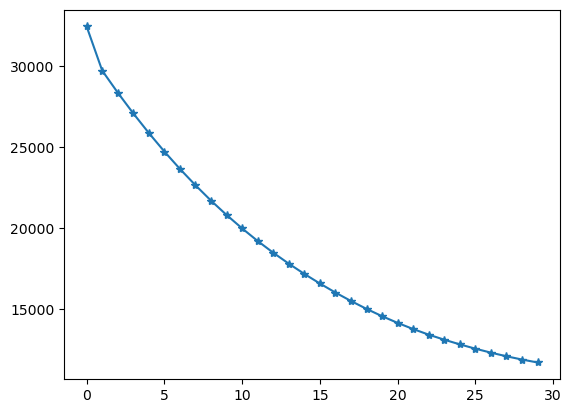

In [38]:
# graficamos los errores en cada epoch
plt.plot(errors, marker='*')